# Multiple Linear Regression with Ethereum Stock Price

Structure of the report:
- Introduction, Project outline and software used
- Background Theory
- Explain the dataset and variables
- Hypothesis
- Implementing the Multiple Linear Regression
- Results 
- Conclusion
- References
- Appendences: Attach Jupyter notebook

Building and evaluating a multiple regression model.

Predicting price of Ethereum using Multiple Linear Regression

In this project will attempt to predicting price of Ethereum using Multiple Linear Regression

The Overall Aim of the Priject:
- Finding a suitable dataset to implement a Multiple LInear Regression Model.
- Explaining the dataset, including source
- Make clear statments fo the objections of anaylsis including the null hypothesis and alternative hypothesis
- Visualisomg the dataset
- Assessing the models equation
- Visualise the model
- Evaluating the model
- Furthermore Validate our results using a validation set
- Conclusion of project

Steps to implement the Multiple Linear Regression:

1. Loading the dataset 
2. Visualise the dataset
3. Preparing the data
4. Spliting the dataset into Training and testing set
5. Training the Model
6. Validating the Fit of the Model
7. Further testing of the model with a Validation set

### Loading the dataset

Start date: 2016-03-10
End date:   2021-08-24


Link to [dataset](https://www.kaggle.com/odins0n/top-50-cryptocurrencies-historical-prices-starter/data?select=Ethereum.csv)

Obtained from investing.com

Include a validation set from the same data source 


For the purpose of this project, we will be applying a Multiple Linear Regression model to a data 

The dataset was obtained from 'Kaggle' which is  public data platform with a hugh inventory of datasets. The datasets from Kaggle are generally clen whic is useful for us as it allows us to forcus on the problem at hand.

Kaggle tells us thar all data has been collected from 'investing.com', which is a solid stock investing website that provides real-time information on Ethereum. 

Ethereum

We will also obtain a validation set from the same source to reafirm to result from our model on unseen data 


The aim of the project: 
we will find out what variables are influeencal when trying to predict
the closing price of the Cryptocurrency.

The [dataset](https://www.kaggle.com/odins0n/top-50-cryptocurrencies-historical-prices-starter/data?select=Ethereum.csv) for this project was obtained from 'Kaggle' that represents all the historical data of Ethereum (ETH): 'Ethereum.csv'. 



(ETH, also known as Ether), 

which is a cryptocurrency used as a decentralised coputing platform.

Kaggle is a public data platform with a hugh inventory of datasets. The datasets from Kaggle are generally clean which is useful for us as it allows us to focus on the problem at hand without having to edit to dataset.

The dataset contains:
- <b>'Date':</b> Date of the cypto prices in NY EST Standard Time
- <b>'Price':</b> Price of Ethereum (in U.S. Dollers)
- <b>'Open':</b> Opening Price of Ethereum on the respective date
- <b>'High':</b> Highest Price of Ethereum on the respective date
- <b>'Low':</b> Lowest Price of Ethereum on the respective date
- <b>'Vol.':</b> Volume of Ethereum transacted on the respective date
- <b>'Change':</b> Percentage of Change in Ethereum Prices on the respective date

### Hypothesis

$H_0$: The 'Price' of the crypotocurrency Ethereum at any given day cannot be predicted by the 'Open', 'High' and 'Low' variables from our dataset for that day. The variables refer to the Opening Price, Highest Price and Lowest Price of Ethereum on that day.

$H_A$: The 'Price' of the crypotocurrency Ethereum at any given day cannot be predicted by the 'Open', 'High' and 'Low' variables from our dataset for that day.

### Loading the dataset

In [1]:
import pandas as pd

# Loads the 'Ethereum_Price_History_USD.csv' file as a DataFrame, using the 
# 'SNo' as the index column
Eth_Price_Data = pd.read_csv('Ethereum_Price_History_USD.csv', index_col='SNo')

# Show us the first 5 Rows in the 'Eth_Price_Data' DataFrame
Eth_Price_Data.head()

,Date,Price,Open,High,Low,Vol.,Change %
SNo,,,,,,,
1,2016-03-10,11.75,11.20,11.85,11.07,0.0,4.91
2,2016-03-11,11.95,11.75,11.95,11.75,180.0,1.70
3,2016-03-12,12.92,11.95,13.45,11.95,830.0,8.12
4,2016-03-13,15.07,12.92,15.07,12.92,1300.0,16.64
5,2016-03-14,12.50,15.07,15.07,11.40,92180.0,-17.05


In [2]:
print('Number of the days of Ethereum prices contained in the dataset: \n', len(Eth_Price_Data['Date']), 'days' )

Number of the days of Ethereum prices contained in the dataset: 
 1994 days


## Visualising the dataset

We will plot the dataset so we can figure out what we can do with the dataset.

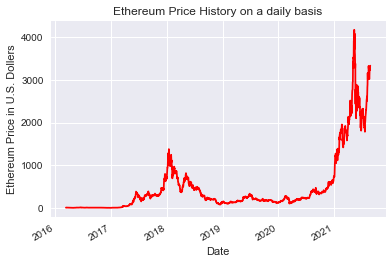

In [3]:
from matplotlib import pyplot as plt

## Styling the plots for the project
plt.style.use(style="seaborn")
%matplotlib inline

# Creates a new DataFrame for plotting the Ethereum price history purposes 
# only containing only the 'Date' and 'Price' Variables as it doesn't
# affect the original dataset
Plot_Eth_Price = pd.DataFrame(Eth_Price_Data, columns = ['Date', 'Price'])

# Creates a Variable 'Plot_Eth_Date' which contains the 'Date' variable only
# We do this to edit the dates without changing the rest of the dataset
Plot_Eth_Date = Plot_Eth_Price['Date']

# Converts the content in the 'Plot_Eth_Date ' variable to datetime
# This is needed for the 'autofmt_xdate()' function used to
## make the plot more readable

## Converts the content in the 'Plotting_Eth_Date' variable to 
## datetime. This is needed for the 'autofmt_xdate()' function 
## used to make the plot of the dataset more readable
Plot_Eth_Date = pd.to_datetime(Plot_Eth_Date)

plt.figure('Ethereum Price History')
plt.title('Ethereum Price History on a daily basis')
plt.xlabel('Date')
plt.ylabel('Ethereum Price in U.S. Dollers')
plt.grid(True)
plt.plot(Plot_Eth_Date, Plot_Eth_Price['Price'], color = 'red')
plt.gcf().autofmt_xdate()
plt.savefig('Ethereum_Price_History.png')

plt.show()

While the 

The formula for the multiple linear regression is:

$$ y = \beta_0 + \beta_1 {X_1} + ... + \beta_n {X_n} + \epsilon $$

where:
- $y$ - is the predicted value of the dependent variable
- $\beta_0$ - the y-intercept (value of y when all other parameters are set to 0)
- $\beta_1{X_1}$ - the regression coefficient ($\beta_1$) of the first independent variable ($X_1$) 
- $ ... $ - continue for all the independent variables are being testing
- $\beta_n{X_n}$ - the regression coefficient of the last independent variable
- $\epsilon$ - model error (how much variation there is in our estimate of y)

### Preparing the dataset for the Model

In [4]:
# Creates a new DataFrame from the dataset that only contains the 'Price',
# 'High', 'Low' and 'Open' Columns
Eth_Price_Data = Eth_Price_Data[['Price', 'High', 'Low', 'Open']].dropna()


# Split our new DataFrame above
# 'data_X' will contain all the columns except the 'Price'
# 'data_Y' will contain only the 'Price' column
data_X = Eth_Price_Data.loc[:,Eth_Price_Data.columns !=  'Price' ]
data_Y = Eth_Price_Data['Price']

### Splitting the dataset into training and testing set.

In [5]:
from sklearn.model_selection import train_test_split

# 'train_test_split' function splits the dataset into two parts: the training
# set and the testing set
# In this case, we are randomly putting 75% of the dataset into the training
# set and the remaining 25% into our testing set.
# The random nature in this process helps to vary the type of data in each set
train_X, test_X, train_Y,test_Y = train_test_split(data_X, data_Y, test_size=0.25)

### Training the model

We want to see how well it can be fit to a linear model

In [6]:
from sklearn.linear_model import LinearRegression

# Creates a Linear Regressor model object and subsequently trains 
# our algroithm with our training set with the fit() method
regressor = LinearRegression()
regressor.fit(train_X,train_Y)

LinearRegression()

Our final linear regression model will be:

$ price = \beta_0  + \beta_1 . High + \beta_2 . Low + \beta_3. Open$

where

$ \beta_0 $ is the intercept

and

$ \beta_1 $, $ \beta_2 $ and $ \beta_3 $ are the coefficients

### Validating the fit()

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# The accuracy score represents the coefficient of the 
# determination (R2). The max value of this variable is 1, 
# but it can be negative. The RSquare is z measure of how
# close the data is to the fitted regression line.
predict_Y = regressor.predict(test_X)
print('Accuracy score with our test set: ' , regressor.score(test_X,test_Y))


# Coefficient are the weights
print('Coefficients: \n')
print(regressor.coef_)

print('\n')
## The intercept is the expected mean value of Y when all X=0
print('Intercept: ', regressor.intercept_)

print('test')
meanAbError = mean_absolute_error(test_Y, predict_Y)


print('\n')

# 'mean_error_'
error = mean_squared_error(test_Y, predict_Y)
print('Mean Squared Error : ',error)


#The mean absolute error (MAE) is the average of all the absolute errors. The absolute error is the 
#difference between the true value (y_train) and the predicted value (y_pred).

print('Mean Absolute Error: ', meanAbError)

#The RMSE is the standard deviation of the residuals. Residuals is the difference between the predicted value and the regression line. Hence RMSE is a measure of how spread your residuals are.

print('Root Mean Squared Error: ', np.sqrt(error))

# The accuracy score represents the coefficient of determination ( 𝑅2 ). This is at max 1, but can be negative. It will be 0 if you predict the mean of y for all observations.

#The R Square is measure of how close the data are to the fitted regression line.

#In this case we can say that our model explains 79% of the training data & 75% of the testing data

#The RMSE is the standard deviation of the residuals. Residuals is the difference between the predicted value and the regression line. Hence RMSE is a measure of how spread your residuals are.

#The mean absolute error (MAE) is the average of all the absolute errors. The absolute error is the difference between the true value (y_train) and the predicted value (y_pred).


## The Root Mean Square Error (RMSE) is the standard deviation of residuals, 
## which is a measure of how far data points are from the regression 
## (or line of best fit)
#{lr_mse = math.sqrt(mean_squared_error(y_test, y_pred))}

## R2Scorer2_score(y_test, y_pres)

Prediction Score with our test set:  0.998857920573417


Mean Squared Error :  573.2777759334997


Prediction Score with our training set:  0.9992429786271418


Coefficients: 

[ 0.90596338  0.61364579 -0.52593155]


Intercept:  0.16971562694192244
test
Mean Absolute Error:  8.722506687463174
Root Mean Squared Error:  23.943219832209277


----------------------------------------------------------------------

$\beta_0 = 0.18372626370052103$

$\beta_1 = 0.91117454$

$\beta_2 = 0.65252649$

$\beta_3 = -0.56826841$

R2 score is close to 1 which indicates that the model used is good.

Both plots are done seperately because they overlap too similerly 

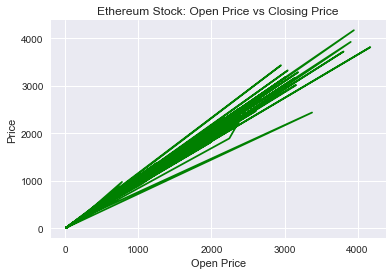

In [8]:
#Plot the predicted and the expected values

plt.title('Ethereum Stock: Open Price vs Closing Price')
plt.xlabel('Open Price')
plt.ylabel('Price')
plt.grid(True)
plt.plot(test_X['Open'],test_Y, color = 'green')
plt.show()

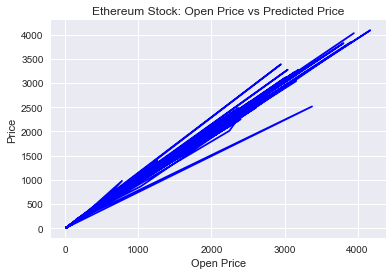

In [9]:
#Plot the predicted and the expected values

plt.title('Ethereum Stock: Open Price vs Predicted Price')
plt.xlabel('Open Price')
plt.ylabel('Price')
plt.grid(True)
plt.plot(test_X['Open'], predict_Y, color = 'blue')
plt.show()

In [10]:
answer = pd.DataFrame({'Actual Price' :test_Y, 'Predicted Price' :predict_Y, 'Difference' :test_Y-predict_Y })

answer

,Actual Price,Predicted Price,Difference
SNo,,,
124,10.51,10.717086,-0.207086
1713,460.43,460.185035,0.244965
613,303.90,302.698376,1.201624
1217,307.41,310.167964,-2.757964
70,13.35,14.249764,-0.899764
...,...,...,...
375,43.17,44.501645,-1.331645
1429,213.16,212.299514,0.860486
788,793.19,792.353920,0.836080


The model suggests that the high-price, low-price and open-price are indicative of the closing price of the same day. Based on the found coefficients, we conclude that the high-price is most influential on the closing price.

-------------------------------------------------------

## Further testing of our model with a validation set

In [11]:
validation_set = pd.read_csv('Ethereum_ValidationSet.csv')

validation_set.head(15)

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-11-13,4688.46,4665.76,4705.02,4585.37,377110,0.45%
1,2021-11-12,4667.31,4720.50,4807.16,4511.96,634590,-1.13%
2,2021-11-11,4720.87,4633.98,4778.17,4578.66,418610,1.87%
3,2021-11-10,4634.03,4731.83,4864.06,4498.78,761900,-2.07%
4,2021-11-09,4731.83,4808.34,4836.69,4715.43,437410,-1.59%
5,2021-11-08,4808.38,4612.05,4822.97,4612.05,673210,4.26%
6,2021-11-07,4612.06,4517.27,4634.39,4502.70,337810,2.10%
7,2021-11-06,4517.36,4475.00,4526.75,4330.29,442600,0.95%
8,2021-11-05,4475.00,4534.96,4569.31,4439.67,409750,-1.33%
9,2021-11-04,4535.11,4601.93,4604.83,4421.87,495860,-1.46%


In [12]:
validating_model = pd.DataFrame(validation_set[['High', 'Low', 'Open']])

valid_Y = regressor.predict(validating_model)

valid_actual_Y = validation_set['Price']

answer = pd.DataFrame({'Date' :validation_set['Date'], 'Actual Price' :valid_actual_Y, 'Predicted Price' :valid_Y, 'Difference' :valid_actual_Y-valid_Y })

answer

,Date,Actual Price,Predicted Price,Difference
0,2021-11-13,4688.46,4622.668137,65.791863
1,2021-11-12,4667.31,4641.366005,25.943995
2,2021-11-11,4720.87,4701.535899,19.334101
3,2021-11-10,4634.03,4678.868666,-44.838666
4,2021-11-09,4731.83,4746.779786,-14.949786
5,2021-11-08,4808.38,4774.146370,34.233630
6,2021-11-07,4612.06,4586.045422,26.014578
7,2021-11-06,4517.36,4404.959980,112.400020
8,2021-11-05,4475.00,4479.103502,-4.103502
9,2021-11-04,4535.11,4465.138790,69.971210


In [13]:
print('Number of days of data in our validation set: ', len(validating_model['High']))


print('Sum of the Differences between our Predicted Price and Acutal Price: \n', sum(answer['Difference']))

avg_diff = sum(answer['Difference']) / len(answer['Difference'])

print('Average Difference per day between our Predicted Price and Acutal Price: \n', avg_diff)

Number of days of data in our validation set:  16
Sum of the Differences between our Predicted Price and Acutal Price: 
 517.028091665542
Average Difference per day between our Predicted Price and Acutal Price: 
 32.314255729096374


---------------------------------------------------------------------